<a href="https://colab.research.google.com/github/melojrx/covid-19-data/blob/master/covid19_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Como criar uma Wordcloud em Python

> Este *notebook* faz parte [deste artigo](https://medium.com/@jrmeloafrf/como-criar-uma-wordcloud-em-python-57d90b51120e) do *blog* Medium.

Wordcloud (em português *nuvem de palavras*) é uma técnica para visualizar palavras frequentes em um texto onde o tamanho das palavras representa sua frequência.

É um tipo de visualização de dados muito poderoso e ferramenta de Data Science usado quando estamos trabalhando com textos, documentos, pesquisas, entre outras.


O processo de visualização necessita de uma etapa anterior que é a obteção de dados. Os dados podem ser obtidos em arquivos de diversas bases de dados como uma API, como um arquivo CSV dentre outros, porém, visando sair um pouco do ponto comum resolvi demonstrar como obter os dados através de um processo de webscraping direto da página da wikipédia quem tem como tema a COVID-19 no Brasil. 



Utilizei duas bibliotecas Python muito importantes em "raspagem de dados", são elas: **urllib and BeautifulSoup**

In [ ]:
# Importando pacotes
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

# Especifique o URL da fonte da página web 
source = urlopen('https://pt.wikipedia.org/wiki/Pandemia_de_COVID-19_no_Brasil').read()

# Criando a soup 
soup = BeautifulSoup(source,'lxml')

# Extraia o conteúdo de texto simples dos parágrafos 
paras = []
for paragraph in soup.find_all('p'):
    paras.append(str(paragraph.text))

# Extraia o conteúdo de texto dos spans
heads = []
for head in soup.find_all('span', attrs={'mw-headline'}):
    heads.append(str(head.text))

# Intercalar parágrafos e cabeçalhos
text = [val for pair in zip(paras, heads) for val in pair]
text = ' '.join(text)

# Retirar sobrescritos de notas de rodapé
text = re.sub(r"\[.*?\]+", '', text)
text = text.replace('\n', '')[:-11]

display(text)


'\t\tPáginas para editores conectados saiba mais Histórico Navegação Antecedentes Colaboração Repatriação de brasileiros na China Ferramentas Início da pandemia no Brasil Imprimir/exportar Sequenciamento do genoma Noutros projetos Infectados e mortos Conteúdo Expansão dos casos A pandemia de COVID-19 no Brasil teve início em 26 de fevereiro de 2020, após a confirmação de que um homem de 61 anos de São Paulo que retornou da Itália testou positivo para o SARS-CoV-2, causador da COVID-19. Desde então, em 14 de julho de 2022, confirmaram-se 33\xa0076\xa0779 casos, segundo o Ministério da Saúde, causando 674\xa0482 mortes. O número de pessoas recuperadas da doença, é de 31\xa0414\xa0937. A transmissão comunitária foi confirmada para todo o território nacional. Primeiras mortes A pandemia afetou a economia do país, que vinha se recuperando da crise econômica de 2014. Em 30 de março de 2020, pela primeira vez, foi prevista uma retração no Produto Interno Bruto (PIB) para o ano, atrasando mais

Após a obtenção dos dados como acima demonstrado passo a passo, vamos a nossa Núvem de Palavras. 
a biblioteca que utilizei foi a: **wordcloud**

In [ ]:
# Importar pacote
import matplotlib.pyplot as plt

# Definir uma função para plotar a nuvem de palavras 
def plot_cloud(wordcloud):
    # Definir o tamanho da figura 
    plt.figure(figsize=(10, 6))
    # Exibir imagem 
    plt.imshow(wordcloud, interpolation='bilinear') 
    # Sem detalhes do eixo 
    plt.axis("off");
    # Salvar em PNG
    wordcloud.to_file("covid19brasil.png")

Um a coisa importante de se utilizar quando a missão de realizar uma visualização de dados é a ajustar entradas que não fazem sentido. No caso de palavras temos a chamadas STOPWORDS, em nossa lingua e para efeitos de análise elas distorcem o resultado por serem palavras corriqueiras e que não trazem sentido. 
Como abaixo mostrado escolhi um grupo de palavras e com o médito *update* ajustei as stopwords.
Após isso, só Plotar o gráfico e verificar o belo resultado. 

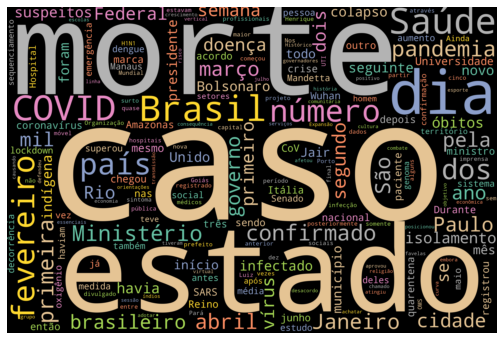

In [ ]:
# Importar pacote
from wordcloud import WordCloud, STOPWORDS
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os", "para", "que", "pelo", "por", 
                  "na", "mais", "uma", "um", "como", "das", "até", "portanto", "era", "foi"])
# Gerar word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', 
                      collocations=False, stopwords = stopwords).generate(text)
# Plotar
plot_cloud(wordcloud)

Recomendo dar uma estudada nos diversos argumentos que podem melhorar sua visualização e enriquecer sua análise. 
São eles: 
Aqui estão algumas notas sobre os argumentos para a função WordCloud :

*   **largura/altura:** você pode alterar a dimensão da nuvem de palavras para sua largura e altura preferidas com eles.
*   **random_state:** Se você não definir isso para um número de sua escolha, provavelmente obterá uma nuvem de palavras ligeiramente diferente toda vez que executar o mesmo script nos mesmos dados de entrada. Ao definir esse parâmetro, você garante a reprodutibilidade da mesma nuvem de palavras exata. Você pode brincar com números aleatórios até encontrar aquele que resulta na nuvem de palavras que você gosta.
*   **background_color:** 'branco' e 'preto' são cores de fundo comuns. Se você quiser explorar mais cores, isso pode ser útil. Por favor, note que algumas cores podem não funcionar. Espero que você encontre algo que goste.
*   **colormap:** Com este argumento, você pode configurar o tema de cores em que as palavras são exibidas. Há muitos mapas de cores Matplotlib bonitos para escolher. Alguns dos meus favoritos são 'rainbow', 'seismic', 'Pastel1' e Pastel2'.
*   **collocations:** defina como False para garantir que a nuvem de palavras não apareça como se contivesse palavras duplicadas. Caso contrário, você pode ver 'web', 'scraping' e 'web scraping' como uma colocação na nuvem de palavras, dando a impressão de que as palavras foram duplicadas.


Suponha que estamos satisfeitos com a nuvem de palavras e gostaríamos de salvá-la como um arquivo .png, podemos fazê-lo usando o código abaixo:


```
# Salvar em PNG
    wordcloud.to_file("covid19brasil.png")
```



## WordCloud com Máscara 

Outra opção interessante é criar uma wordcloud difereto dentro de uma imagem. A parte mais complicada é encontrar uma imagem compatível. 

[Neste Link](https://www.kaggle.com/datasets/aashita/masks) encontrei algumas imagens que encaixaram bem a proposta. 
Entra lá e tenta incluir em algumas, o resultado está abaixo. 

Importante salientar que a biblioteca que permite essa customização é a: **pillow (will later import is as PIL)**

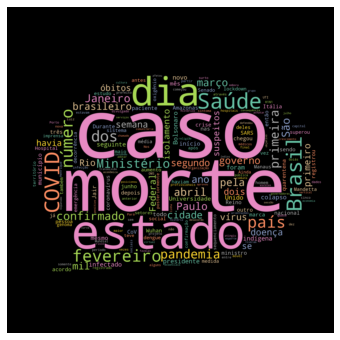

In [ ]:
# Importar pacote
import numpy as np
from PIL import Image
# Importar imagem para np.array
mask = np.array(Image.open('/content/comment.png'))
# Gerar wordcloud
wordcloud = WordCloud(width = 2500, height = 1500, random_state=1, background_color='black', 
                      colormap='Set2', collocations=False, stopwords = stopwords, mask=mask).generate(text)
# Plotar
plot_cloud(wordcloud)

# Salvar PNG
wordcloud.to_file("covid19brasil_mask.png")

Enfim, esse modelo de visualização está cada vez mais difuldido e utilizar o python para customizar suas analises com gráficos que chamem atenção com elementos pré-atentivos e com visualizações que saem um pouco do padrão sem exagerar a ponto de perder o foco nos dados com certeza vai trazer grande diferencial ao seu trabalho. 